<a href="https://colab.research.google.com/github/AhmedKiser/CSE-299-Project/blob/main/Crop_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# New section

In [2]:
df = pd.read_csv('Crop_recommendation.csv')

In [3]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [5]:
df.shape

(2200, 8)

In [6]:
df.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [7]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

# Visualization

In [8]:
n = df[['N']]
p = df[['P']]
k = df[['K']]
t = df[['temperature']]
h = df[['humidity']]
ph = df[['ph']]
r = df[['rainfall']]
l = df['label']

n, p, k, t, h, ph, r, l

(        N
 0      90
 1      85
 2      60
 3      74
 4      78
 ...   ...
 2195  107
 2196   99
 2197  118
 2198  117
 2199  104
 
 [2200 rows x 1 columns],
        P
 0     42
 1     58
 2     55
 3     35
 4     42
 ...   ..
 2195  34
 2196  15
 2197  33
 2198  32
 2199  18
 
 [2200 rows x 1 columns],
        K
 0     43
 1     41
 2     44
 3     40
 4     42
 ...   ..
 2195  32
 2196  27
 2197  30
 2198  34
 2199  30
 
 [2200 rows x 1 columns],
       temperature
 0       20.879744
 1       21.770462
 2       23.004459
 3       26.491096
 4       20.130175
 ...           ...
 2195    26.774637
 2196    27.417112
 2197    24.131797
 2198    26.272418
 2199    23.603016
 
 [2200 rows x 1 columns],
        humidity
 0     82.002744
 1     80.319644
 2     82.320763
 3     80.158363
 4     81.604873
 ...         ...
 2195  66.413269
 2196  56.636362
 2197  67.225123
 2198  52.127394
 2199  60.396475
 
 [2200 rows x 1 columns],
             ph
 0     6.502985
 1     7.038096
 2     7

In [9]:
# plt.scatter(n)

Text(0, 0.5, 'Data')

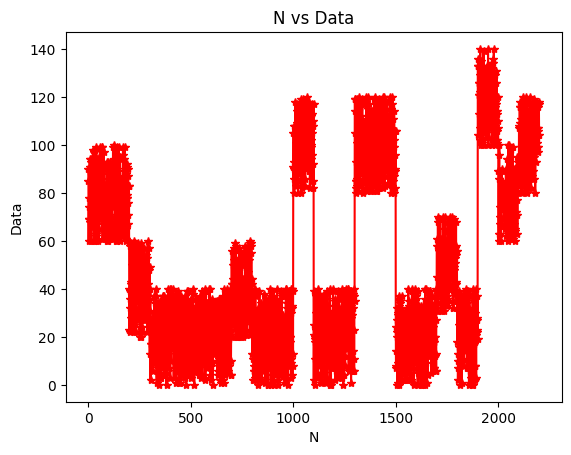

In [10]:
plt.plot(n, marker = '*', color = 'r')
plt.title("N vs Data")
plt.xlabel("N")
plt.ylabel("Data")

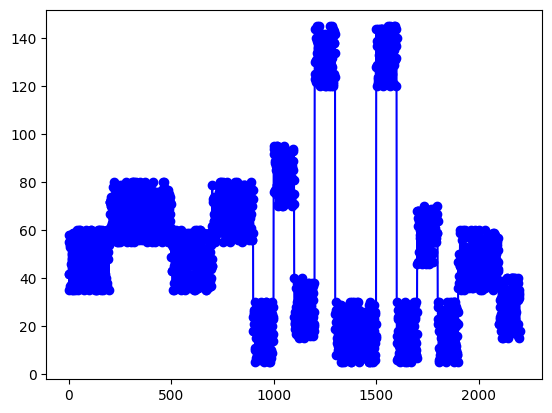

In [11]:
plt.plot(p, marker = 'o', color = 'b')

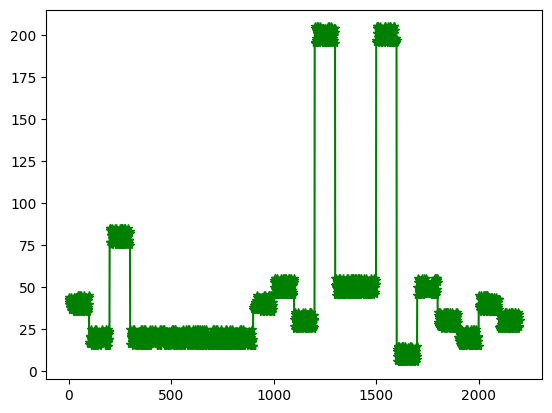

In [12]:
plt.plot(k, marker = '*', color = 'g')

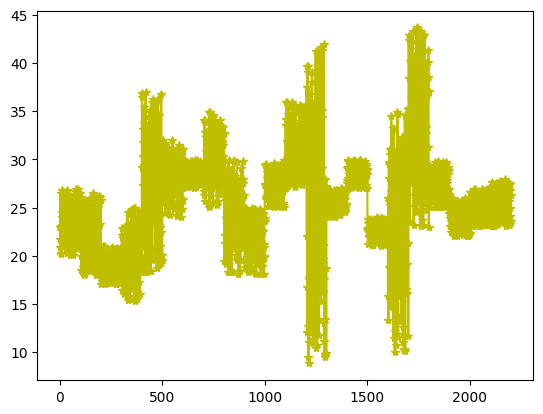

In [13]:
plt.plot(t, marker = '*', color = 'y')

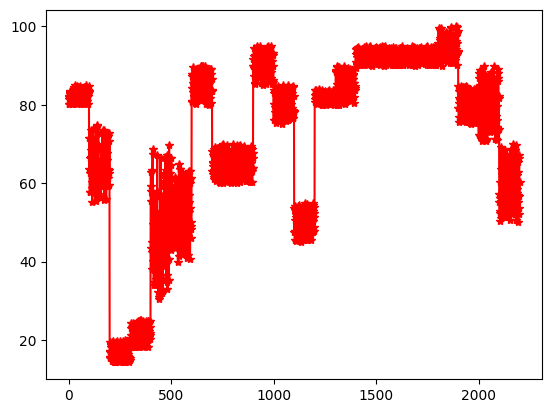

In [14]:
plt.plot(h, marker = '*', color = 'r')

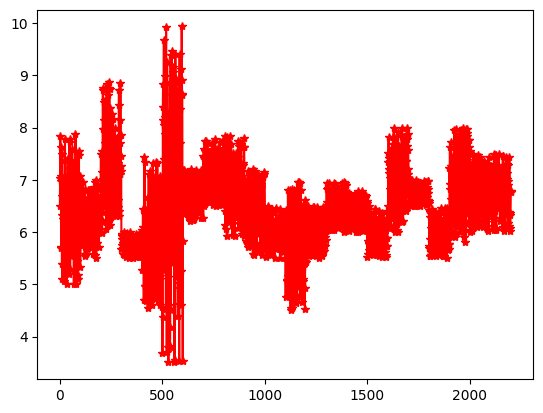

In [15]:
plt.plot(ph, marker = '*', color = 'r')

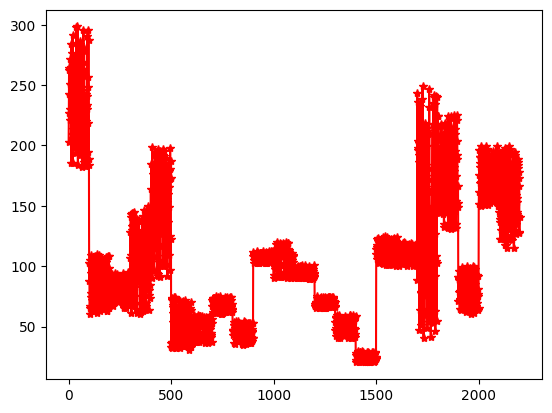

In [16]:
plt.plot(r, marker = '*', color = 'r')

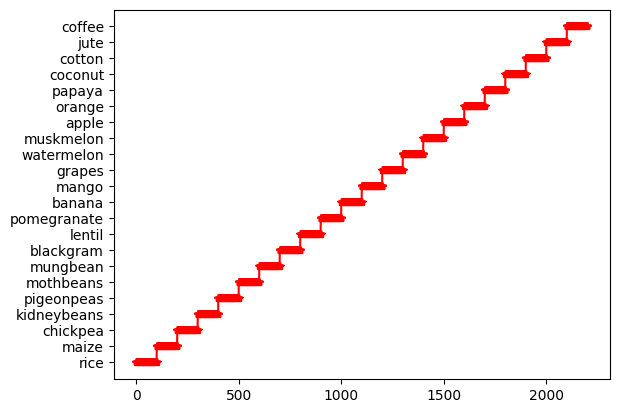

In [17]:
plt.plot(l, marker = '*', color = 'r')

# Separate Label

In [18]:
x = df.drop(['label'],axis= 1)
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [19]:
y = df['label']
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

# Encoding

In [24]:
crop =  pd.get_dummies(df['label'], drop_first = True)
crop

,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,lentil,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2196,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2197,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2198,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## concat 

In [25]:
x = pd.concat([x,crop], axis = 1)
x

,N,P,K,temperature,humidity,ph,rainfall,banana,blackgram,chickpea,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#import scikit learn
from sklearn.model_selection import train_test_split
